# Simple machine learning with Pandas

For this module, we will be exploring simple machine learning techniques using the pandas library. You will learn about:

* Prepping data
* Exploring data
* Cleaning data
* Making model
* Tuning model
* Evaluating model
 

## Get Data

In [1]:
# https://archive.ics.uci.edu/ml/datasets/heart+disease
import numpy as np
import pandas as pd

import glob

In [2]:
names = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num']

files = glob.glob('data/processed*.data')
df = pd.concat([pd.read_csv(f, sep=',',names=names, na_values='?',
                            dtype_backend='pyarrow',
                           engine='pyarrow')
                for f in files], axis='index', ignore_index=True)
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
915,54.0,0.0,4.0,127.0,333.0,1.0,1.0,154.0,0.0,0.0,<NA>,<NA>,<NA>,1
916,62.0,1.0,1.0,<NA>,139.0,0.0,1.0,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,0
917,55.0,1.0,4.0,122.0,223.0,1.0,1.0,100.0,0.0,0.0,<NA>,<NA>,6.0,2
918,58.0,1.0,4.0,<NA>,385.0,1.0,2.0,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,0


In [3]:
df.fbs.value_counts()

fbs
0.0    692
1.0    138
Name: count, dtype: int64[pyarrow]

In [4]:
df.dtypes

age         double[pyarrow]
sex         double[pyarrow]
cp          double[pyarrow]
trestbps    double[pyarrow]
chol        double[pyarrow]
fbs         double[pyarrow]
restecg     double[pyarrow]
thalach     double[pyarrow]
exang       double[pyarrow]
oldpeak     double[pyarrow]
slope       double[pyarrow]
ca          double[pyarrow]
thal        double[pyarrow]
num          int64[pyarrow]
dtype: object

In [5]:
def tweak_heart(df:pd.DataFrame): 
  return (df
   .astype({'age': 'int8[pyarrow]', 'cp': 'int8[pyarrow]', 
            'chol': 'int16[pyarrow]',
            'num': 'int8[pyarrow]', 'trestbps': 'int16[pyarrow]',
            'fbs': 'bool[pyarrow]', 'restecg': 'int8[pyarrow]',
            'thalach': 'int16[pyarrow]', 'exang': 'bool[pyarrow]',
           })
   .assign(sex=df.sex
                .astype('string[pyarrow]')
                .replace({'1.0': 'male', '0.0':'female'}),
          thal=(df.thal.astype('string[pyarrow]')
                       .replace({'3.0': 'normal',
                          '6.0': 'fixed', '7.0': 'reversible'})
                       .astype('category')),
          slope=(df.slope
                .astype('string[pyarrow]')
                .replace({'1.0': 'upsloping', '2.0': 'flat',
                         '3.0': 'downsloping'})
               ),
    )
  )

heart = tweak_heart(df)

In [6]:
heart

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63,male,1,145,233,True,2,150,False,2.3,downsloping,0.0,fixed,0
1,67,male,4,160,286,False,2,108,True,1.5,flat,3.0,normal,2
2,67,male,4,120,229,False,2,129,True,2.6,flat,2.0,reversible,1
3,37,male,3,130,250,False,0,187,False,3.5,downsloping,0.0,normal,0
4,41,female,2,130,204,False,2,172,False,1.4,upsloping,0.0,normal,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
915,54,female,4,127,333,True,1,154,False,0.0,<NA>,<NA>,<NA>,1
916,62,male,1,<NA>,139,False,1,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,0
917,55,male,4,122,223,True,1,100,False,0.0,<NA>,<NA>,fixed,2
918,58,male,4,<NA>,385,True,2,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,0


In [7]:
df.memory_usage(deep=True).sum()

104225

In [8]:
heart.memory_usage(deep=True).sum()

41979

## Explore Data

In [9]:
(heart
    .groupby('num')
    .mean(numeric_only=True)
    .style
    .background_gradient(cmap='RdBu', axis='index')
)

,age,cp,trestbps,chol,restecg,thalach,oldpeak,ca
num,,,,,,,,
0,50.547445,2.761557,129.913043,227.905612,0.547445,148.800512,0.418205,0.278788
1,53.528302,3.581132,132.861111,195.255814,0.524715,131.035714,1.001200,0.741379
2,57.577982,3.724771,133.613861,143.859813,0.697248,128.666667,1.353465,1.222222
3,59.214953,3.691589,136.152174,159.716981,0.775701,120.500000,1.581319,1.459459
4,59.214286,3.750000,138.720000,192.148148,1.178571,127.846154,2.307692,1.692308


In [10]:
(heart
    .groupby('num')
    .mean(numeric_only=True)
    .T
    .astype('float[pyarrow]')
    .style
    .background_gradient(cmap='RdBu', axis='columns')
)

num,0,1,2,3,4
age,50.547443,53.528301,57.577980,59.214954,59.214287
cp,2.761557,3.581132,3.724771,3.691589,3.750000
trestbps,129.913040,132.861115,133.613861,136.152176,138.720001
chol,227.905609,195.255814,143.859818,159.716980,192.148148
restecg,0.547445,0.524715,0.697248,0.775701,1.178571
thalach,148.800507,131.035721,128.666672,120.500000,127.846153
oldpeak,0.418205,1.001200,1.353465,1.581319,2.307692
ca,0.278788,0.741379,1.222222,1.459459,1.692308


In [11]:
(heart
    .corr(method='spearman', numeric_only=True)
    .style
    .background_gradient(cmap='RdBu', axis='columns', vmin=-1, vmax=1)
)

,age,cp,trestbps,chol,restecg,thalach,oldpeak,ca,num
age,1.000000,0.173435,0.259390,-0.037350,0.234089,-0.348333,0.287774,0.391373,0.347184
cp,0.173435,1.000000,0.042221,-0.079165,0.050688,-0.374185,0.299928,0.244589,0.486915
trestbps,0.259390,0.042221,1.000000,0.104124,0.095274,-0.090019,0.161414,0.070735,0.126805
chol,-0.037350,-0.079165,0.104124,1.000000,0.103135,0.175163,0.048178,0.113139,-0.157563
restecg,0.234089,0.050688,0.095274,0.103135,1.000000,0.020468,0.113831,0.138711,0.128880
thalach,-0.348333,-0.374185,-0.090019,0.175163,0.020468,1.000000,-0.188105,-0.285559,-0.398360
oldpeak,0.287774,0.299928,0.161414,0.048178,0.113831,-0.188105,1.000000,0.254469,0.434273
ca,0.391373,0.244589,0.070735,0.113139,0.138711,-0.285559,0.254469,1.000000,0.528047
num,0.347184,0.486915,0.126805,-0.157563,0.128880,-0.398360,0.434273,0.528047,1.000000


<Axes: xlabel='num', ylabel='thalach'>

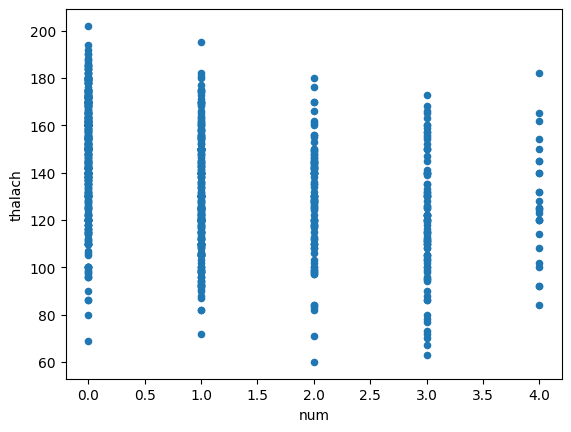

In [12]:
heart.plot.scatter(x='num', y='thalach')

<Axes: xlabel='numj', ylabel='thalach'>

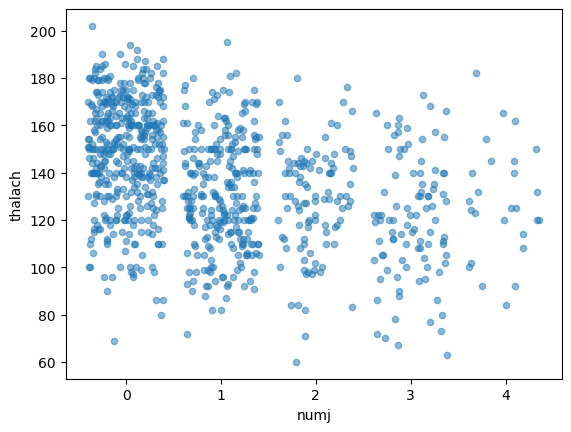

In [13]:
def jitter(df:pd.DataFrame, col:str, amount:int=1):
    return df[col] + (np.random.random(len(df)) * amount) - amount /2
(heart
 .assign(numj=lambda df_:jitter(df_, 'num', .8))
 .plot.scatter(x='numj', y='thalach', alpha=.5)
)

<Axes: xlabel='num', ylabel='cp'>

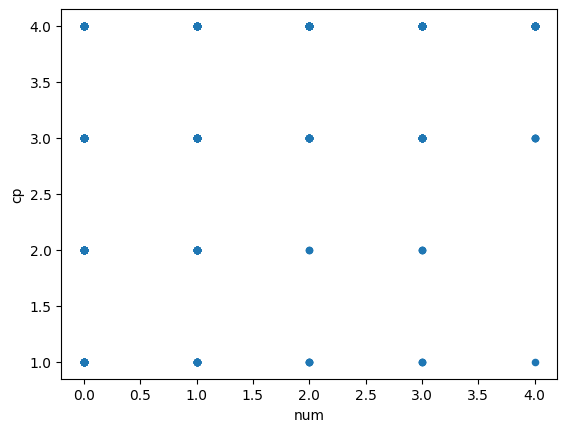

In [14]:
heart.plot.scatter(x='num', y='cp')

<Axes: xlabel='numj', ylabel='cpj'>

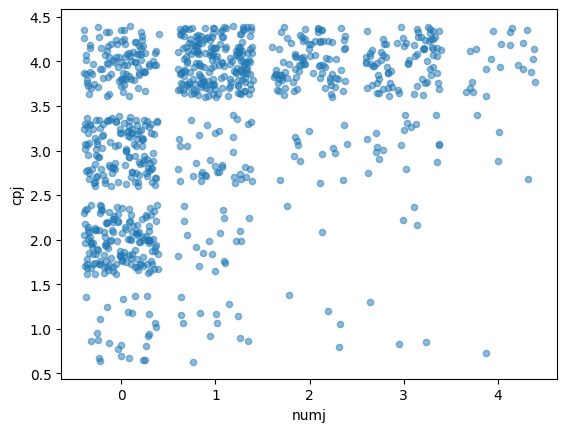

In [15]:
(heart
 .assign(numj=lambda df_:jitter(df_, 'num', .8),
         cpj=lambda df_:jitter(df_, 'cp', .8))
 .plot.scatter(x='numj', y='cpj', alpha=.5)
)

In [16]:
(heart
 .groupby('sex')
 .mean(numeric_only=True)
 .T
 .style
 .background_gradient(cmap='RdBu', axis='columns')
)

sex,female,male
age,52.474227,53.787879
cp,2.943299,3.331956
trestbps,132.093750,132.143498
chol,241.481283,187.864865
restecg,0.628866,0.598066
thalach,146.244792,135.063893
oldpeak,0.668394,0.939850
ca,0.546392,0.735849
num,0.422680,1.148760


In [17]:
(heart
 .assign(sex=(heart.sex == 'male').astype('int8[pyarrow]'))
 .corr(numeric_only=True)
 .style
 .background_gradient(cmap='RdBu', axis='columns')
)

,age,sex,cp,trestbps,chol,restecg,thalach,oldpeak,ca,num
age,1.000000,0.056889,0.166245,0.244253,-0.086234,0.212719,-0.365778,0.258243,0.370416,0.339596
sex,0.056889,1.000000,0.170392,0.001087,-0.197281,-0.015612,-0.179320,0.103930,0.094123,0.259342
cp,0.166245,0.170392,1.000000,0.025075,-0.132576,0.031101,-0.349189,0.244245,0.214975,0.397896
trestbps,0.244253,0.001087,0.025075,1.000000,0.092853,0.098857,-0.104899,0.161908,0.093705,0.122291
chol,-0.086234,-0.197281,-0.132576,0.092853,1.000000,0.116494,0.236121,0.047734,0.051606,-0.231547
restecg,0.212719,-0.015612,0.031101,0.098857,0.116494,1.000000,0.053120,0.118297,0.139154,0.140089
thalach,-0.365778,-0.179320,-0.349189,-0.104899,0.236121,0.053120,1.000000,-0.151174,-0.264094,-0.366265
oldpeak,0.258243,0.103930,0.244245,0.161908,0.047734,0.118297,-0.151174,1.000000,0.281817,0.443084
ca,0.370416,0.094123,0.214975,0.093705,0.051606,0.139154,-0.264094,0.281817,1.000000,0.516216
num,0.339596,0.259342,0.397896,0.122291,-0.231547,0.140089,-0.366265,0.443084,0.516216,1.000000


## Prepping for ML

In [18]:
heart.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num'],
      dtype='object')

In [19]:
heart.num

0      0
1      2
2      1
3      0
4      0
      ..
915    1
916    0
917    2
918    0
919    1
Name: num, Length: 920, dtype: int8[pyarrow]

In [20]:
heart.num.value_counts()

num
0    411
1    265
2    109
3    107
4     28
Name: count, dtype: int64[pyarrow]

In [21]:
heart.isna()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
915,False,False,False,False,False,False,False,False,False,False,True,True,True,False
916,False,False,False,True,False,False,False,True,True,True,True,True,True,False
917,False,False,False,False,False,False,False,False,False,False,True,True,False,False
918,False,False,False,True,False,False,False,True,True,True,True,True,True,False


In [22]:
heart.isna().any()

age         False
sex         False
cp          False
trestbps     True
chol         True
fbs          True
restecg      True
thalach      True
exang        True
oldpeak      True
slope        True
ca           True
thal         True
num         False
dtype: bool

In [23]:
heart.isna().sum()

age           0
sex           0
cp            0
trestbps     59
chol         30
fbs          90
restecg       2
thalach      55
exang        55
oldpeak      62
slope       309
ca          611
thal        486
num           0
dtype: int64

In [24]:
heart.isna().mean()*100

age          0.000000
sex          0.000000
cp           0.000000
trestbps     6.413043
chol         3.260870
fbs          9.782609
restecg      0.217391
thalach      5.978261
exang        5.978261
oldpeak      6.739130
slope       33.586957
ca          66.413043
thal        52.826087
num          0.000000
dtype: float64

In [25]:
heart.num.value_counts(dropna=False)

num
0    411
1    265
2    109
3    107
4     28
Name: count, dtype: int64[pyarrow]

In [26]:
heart.dtypes

age           int8[pyarrow]
sex         string[pyarrow]
cp            int8[pyarrow]
trestbps     int16[pyarrow]
chol         int16[pyarrow]
fbs           bool[pyarrow]
restecg       int8[pyarrow]
thalach      int16[pyarrow]
exang         bool[pyarrow]
oldpeak     double[pyarrow]
slope       string[pyarrow]
ca          double[pyarrow]
thal               category
num           int8[pyarrow]
dtype: object

In [27]:
heart.select_dtypes('int64[pyarrow]')

""
0
1
2
3
4
...
915
916
917
918


In [28]:
heart.select_dtypes('number')

,age,cp,trestbps,chol,restecg,thalach,oldpeak,ca,num
0,63,1,145,233,2,150,2.3,0.0,0
1,67,4,160,286,2,108,1.5,3.0,2
2,67,4,120,229,2,129,2.6,2.0,1
3,37,3,130,250,0,187,3.5,0.0,0
4,41,2,130,204,2,172,1.4,0.0,0
...,...,...,...,...,...,...,...,...,...
915,54,4,127,333,1,154,0.0,<NA>,1
916,62,1,<NA>,139,1,<NA>,<NA>,<NA>,0
917,55,4,122,223,1,100,0.0,<NA>,2
918,58,4,<NA>,385,2,<NA>,<NA>,<NA>,0


In [29]:
import xgboost as xg
from sklearn import model_selection

X = (heart
     .assign(**heart.select_dtypes(object).astype('category'),
            # boolean is not supported 
             **heart.select_dtypes('number').astype(float),
            )
     .astype({'sex': 'category', 'fbs': float, 'exang': float,
             'slope': 'category'})
     .drop(columns=['num'])
     
    )
y = heart.num

X_train, X_test, y_train, y_test = model_selection.train_test_split(
    X, y, stratify=y, random_state=42)

xgb = xg.XGBClassifier(enable_categorical=True, tree_method='hist')
xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=True, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [30]:
xgb.score(X_test, y_test)

0.5782608695652174

In [31]:
xgb.score(X_train, y_train)

1.0

## Tuning the Model

In [32]:
# !pip install hyperopt

In [42]:
# from hyperopt import fmin, tpe, hp, STATUS_OK, Trials
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn import metrics

from typing import Any, Dict, Union

In [33]:
def hyperparameter_tuning(space: Dict[str, Union[float, int]], 
                    X_train: pd.DataFrame, y_train: pd.Series, 
                    X_test: pd.DataFrame, y_test: pd.Series, 
                    early_stopping_rounds: int=50,
                    metric:callable=accuracy_score) -> Dict[str, Any]:
    """
    Perform hyperparameter tuning for an XGBoost classifier.

    This function takes a dictionary of hyperparameters, training 
    and test data, and an optional value for early stopping rounds, 
    and returns a dictionary with the loss and model resulting from 
    the tuning process. The model is trained using the training 
    data and evaluated on the test data. The loss is computed as 
    the negative of the accuracy score.

    Parameters
    ----------
    space : Dict[str, Union[float, int]]
        A dictionary of hyperparameters for the XGBoost classifier.
    X_train : pd.DataFrame
        The training data.
    y_train : pd.Series
        The training target.
    X_test : pd.DataFrame
        The test data.
    y_test : pd.Series
        The test target.
    early_stopping_rounds : int, optional
        The number of early stopping rounds to use. The default value 
        is 50.
    metric : callable
        Metric to maximize. Default is accuracy

    Returns
    -------
    Dict[str, Any]
        A dictionary with the loss and model resulting from the 
        tuning process. The loss is a float, and the model is an 
        XGBoost classifier.
    """
    int_vals = ['max_depth', 'reg_alpha']
    space = {k: (int(val) if k in int_vals else val)
             for k,val in space.items()}
    space['early_stopping_rounds'] = early_stopping_rounds
    model = xg.XGBClassifier(**space)
    evaluation = [(X_train, y_train),
                  (X_test, y_test)]
    model.fit(X_train, y_train,
              eval_set=evaluation, 
              verbose=False)    
         
    pred = model.predict(X_test)
    score = metric(y_test, pred)
    return {'loss': -score, 'status': STATUS_OK, 'model': model}

params = {'random_state': 42}

rounds = [#{'scale_pos_weight': hp.uniform('scale_pos_weight', 1, 10),},
          {'max_depth': hp.quniform('max_depth', 1, 8, 1),  # tree
           'min_child_weight': hp.loguniform('min_child_weight', -2, 3)},
          {'subsample': hp.uniform('subsample', 0.5, 1),   # stochastic
           'colsample_bytree': hp.uniform('colsample_bytree', 0.5, 1)},

          {'reg_alpha': hp.uniform('reg_alpha', 0, 10),
            'reg_lambda': hp.uniform('reg_lambda', 1, 10),},
          {'gamma': hp.loguniform('gamma', -10, 10)}, # regularization
          {'learning_rate': hp.loguniform('learning_rate', -7, 0)} # boosting
]

all_trials = []
for round in rounds:
    params = {**params, **round, 
             'enable_categorical':True, 'tree_method':'hist'}
    trials = Trials()
    best = fmin(fn=lambda space: hyperparameter_tuning(space, X_train, 
                                        y_train, X_test, y_test,
                                        metric=lambda *args: metrics.f1_score(*args, average='weighted')),            
        space=params,           
        algo=tpe.suggest,            
        max_evals=20,            
        trials=trials,
    )
    params = {**params, **best}
    all_trials.append(trials)

ModuleNotFoundError: No module named 'imp'

In [34]:
params

NameError: name 'params' is not defined

In [35]:
params = {'random_state': 42,
 'max_depth': 4,
 'min_child_weight': 14.29114166877302,
 'enable_categorical': True,
 'tree_method': 'hist',
 'subsample': 0.721322460424803,
 'colsample_bytree': 0.5936738818753071,
 'reg_alpha': 0.4623525681816598,
 'reg_lambda': 6.545829654680657,
 'gamma': 0.003379106348942887,
 'learning_rate': 0.8040669979502167}
xgb_step = xg.XGBClassifier(**params, 
                            early_stopping_rounds=50,
                           n_estimators=2500)
xgb_step.fit(X_train, y_train,
            eval_set=[(X_train, y_train),
                 (X_test, y_test)
                ],
        verbose=100)

[0]	validation_0-mlogloss:1.22352	validation_1-mlogloss:1.23048
[55]	validation_0-mlogloss:0.53816	validation_1-mlogloss:1.10166


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.5936738818753071, device=None,
              early_stopping_rounds=50, enable_categorical=True,
              eval_metric=None, feature_types=None, gamma=0.003379106348942887,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.8040669979502167,
              max_bin=None, max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=4, max_leaves=None,
              min_child_weight=14.29114166877302, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=2500,
              n_jobs=None, num_parallel_tree=None, objective='multi:softprob', ...)

In [36]:
xgb_step.score(X_test, y_test)

0.5782608695652174

In [37]:
xgb.score(X_test, y_test)

0.5782608695652174

In [38]:
xgb_step.score(X_train, y_train)

0.6507246376811594

In [39]:
xgb.score(X_train, y_train)

1.0

## Confusion Matrix

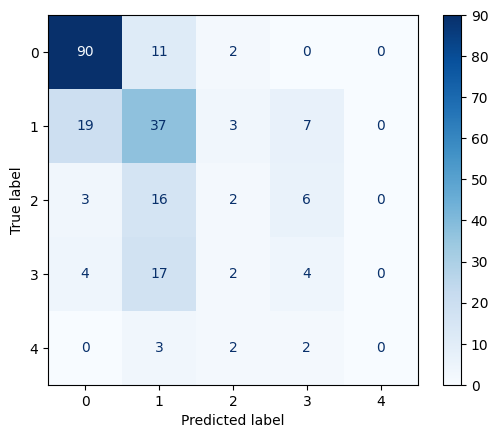

In [43]:
metrics.ConfusionMatrixDisplay.from_estimator(xgb_step, X_test, y_test,
        cmap='Blues')

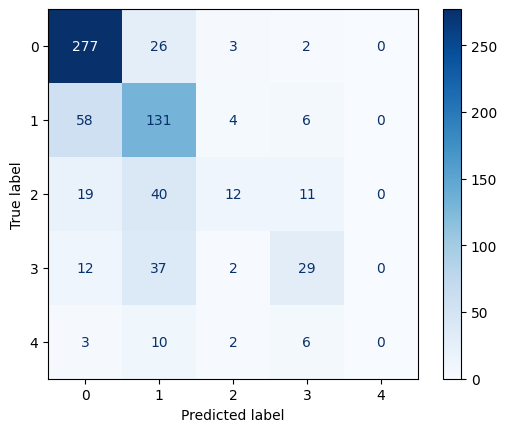

In [44]:
metrics.ConfusionMatrixDisplay.from_estimator(xgb_step, X_train, y_train,
        cmap='Blues')

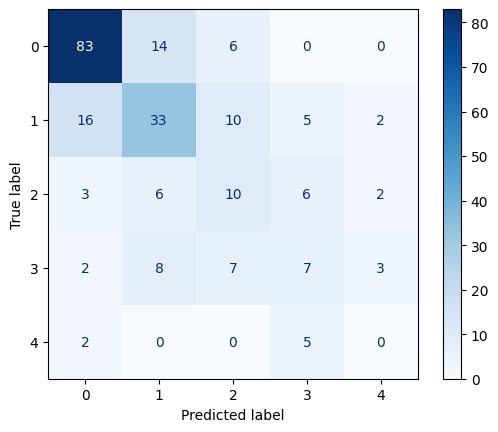

In [45]:
# Checking for overfitting with default model
metrics.ConfusionMatrixDisplay.from_estimator(xgb, X_test, y_test,
        cmap='Blues')

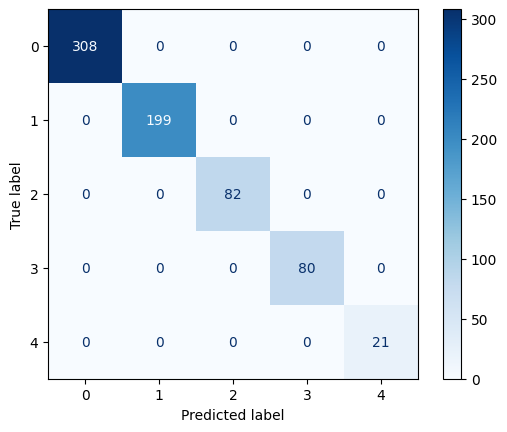

In [46]:
metrics.ConfusionMatrixDisplay.from_estimator(xgb, X_train, y_train,
        cmap='Blues')